In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#change this to your local drive
file_string = "/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/ScrapedSP500.csv"
sp500 = pd.read_csv(file_string)

In [2]:
days_to_predict = 20

In [3]:
print("First 10 Days of S&P500 Data\n", sp500.head(10))

First 10 Days of S&P500 Data
          Date         High          Low         Open        Close      Volume  \
0  2012-12-12  1438.589966  1426.760010  1427.839966  1428.479980  3709050000   
1  2012-12-13  1431.359985  1416.000000  1428.479980  1419.449951  3349960000   
2  2012-12-14  1419.449951  1411.880005  1419.449951  1413.579956  3210170000   
3  2012-12-17  1430.670044  1413.540039  1413.540039  1430.359985  3455610000   
4  2012-12-18  1448.000000  1430.469971  1430.469971  1446.790039  4302240000   
5  2012-12-19  1447.750000  1435.800049  1446.790039  1435.810059  3869800000   
6  2012-12-20  1443.699951  1432.819946  1435.810059  1443.689941  3686580000   
7  2012-12-21  1443.670044  1422.579956  1443.670044  1430.150024  5229160000   
8  2012-12-24  1430.150024  1424.660034  1430.150024  1426.660034  1248960000   
9  2012-12-26  1429.420044  1416.430054  1426.660034  1419.829956  2285030000   

     Adj Close  
0  1428.479980  
1  1419.449951  
2  1413.579956  
3  1430.35

Convert Date column to pandas datetime object, trim data to Jan 1 2022 and onward, and make chronological

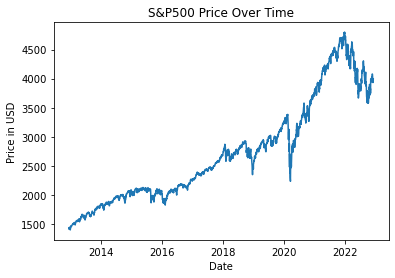

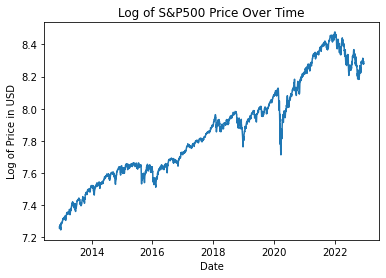

            Date         High          Low         Open        Close  \
2014  2020-12-11  3665.909912  3633.399902  3656.080078  3663.459961   
2015  2020-12-14  3697.610107  3645.840088  3675.270020  3647.489990   
2016  2020-12-15  3695.290039  3659.620117  3666.409912  3694.620117   
2017  2020-12-16  3711.270020  3688.570068  3696.250000  3701.169922   
2018  2020-12-17  3725.120117  3710.870117  3713.649902  3722.479980   

          Volume    Adj Close   DateTime  
2014  4375470000  3663.459961 2020-12-11  
2015  4623850000  3647.489990 2020-12-14  
2016  4387080000  3694.620117 2020-12-15  
2017  4067040000  3701.169922 2020-12-16  
2018  4192810000  3722.479980 2020-12-17  


In [4]:
sp500['DateTime'] = pd.to_datetime(sp500['Date'])
#sp500['DateTime'] = np.where(sp500['DateTime'].dt.year > 2022, sp500['DateTime'] - pd.offsets.DateOffset(years=100), sp500['DateTime'])
# Anything after 2022 is changed to have 100 years subtracted because 2022 is the current year, change it as the years progress
plt.plot(sp500['DateTime'].loc[sp500['DateTime']>='1962-01-01'],sp500['Adj Close'].loc[sp500['DateTime']>='1962-01-01'])
plt.title("S&P500 Price Over Time")
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

plt.plot(sp500['DateTime'].loc[sp500['DateTime']>='1962-01-01'],np.log(sp500['Adj Close'].loc[sp500['DateTime']>='1962-01-01']))
plt.title("Log of S&P500 Price Over Time")
plt.xlabel('Date')
plt.ylabel('Log of Price in USD')
plt.show()

end_date = pd.to_datetime('2021-12-31')
start_date = end_date - pd.offsets.DateOffset(days = days_to_predict)-pd.offsets.DateOffset(years = 1)

sp500 = sp500.loc[(sp500['DateTime']>=start_date)&(sp500['DateTime']<=end_date)]
#sp500 = sp500.loc[::-1].reset_index(drop=True)
print(sp500.head())


Perform Log Return Transformation

Transform price into log price for time series fitting

In [5]:
sp500['log_price'] = np.log(sp500['Adj Close'])

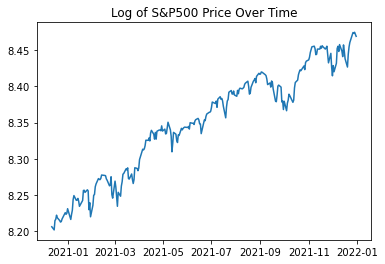

In [6]:
plt.plot(sp500['DateTime'],sp500['log_price'])
plt.title("Log of S&P500 Price Over Time")
plt.show()

Residuals are centered at 0 but not independent from time - there is periodicity

[0.00092334]
8.228137330446236


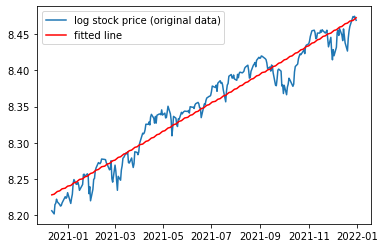

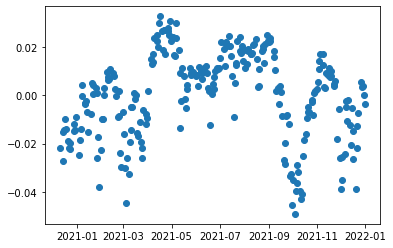

In [7]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
index = sp500.reset_index().index.values.reshape(-1,1)

clf.fit(index, sp500['log_price'])
print(clf.coef_) # To print the coefficient estimate of the series. 

print(clf.intercept_) # To print the coefficient estimate of the series. 
linear_prediction = clf.predict(index)
plt.plot(sp500['DateTime'], sp500['log_price'], label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals = sp500['log_price'] - linear_prediction
plt.plot(sp500['DateTime'], linear_residuals, 'o')
plt.show();

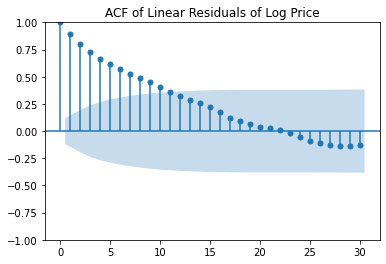

/Users/douglasallen/opt/anaconda3/envs/6.86x/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


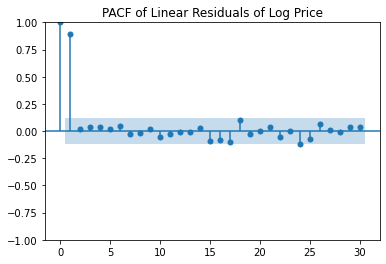

In [8]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(linear_residuals, lags=30)
plt.title('ACF of Linear Residuals of Log Price')
plt.show()
sm.graphics.tsa.plot_pacf(linear_residuals, lags=30)
plt.title('PACF of Linear Residuals of Log Price')
plt.show()

/Users/douglasallen/opt/anaconda3/envs/6.86x/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/douglasallen/opt/anaconda3/envs/6.86x/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/douglasallen/opt/anaconda3/envs/6.86x/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              log_price   No. Observations:                  246
Model:                ARIMA(1, 0, 10)   Log Likelihood                 848.159
Date:                Tue, 13 Dec 2022   AIC                          -1670.317
Time:                        22:17:51   BIC                          -1624.748
Sample:                             0   HQIC                         -1651.969
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.006     -0.157      0.875      -0.014       0.012
ar.L1          0.8741      0.086     10.221      0.000       0.706       1.042
ma.L1         -0.0054      0.100     -0.053      0.9

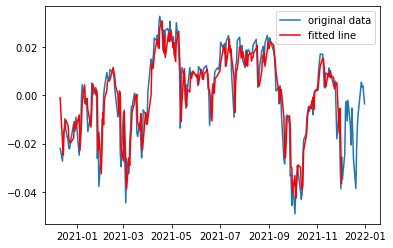

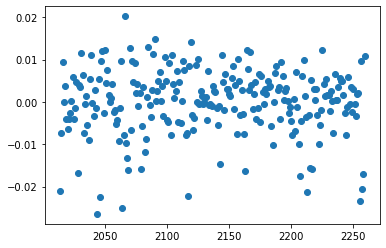

MSE with AR(1) model: 6.031014418320081e-05


In [9]:
from statsmodels.tsa.arima.model import ARIMA
AR_order = 1
AR_differentiation = 0
MA_order = 10

training_days = sp500.iloc[0:sp500.shape[0]-days_to_predict]['DateTime']
train_residuals = linear_residuals.iloc[0:sp500.shape[0]-days_to_predict]
sp500_arima = ARIMA(train_residuals, order=(AR_order, AR_differentiation, MA_order)).fit()
print(sp500_arima.summary())
ar_higher_predictions = sp500_arima.predict()
ar_higher_residuals = train_residuals - ar_higher_predictions
ar_higher_residuals = ar_higher_residuals # Fitting AR 1 model means removing one observation
plt.plot(sp500['DateTime'],linear_residuals, label='original data')
plt.plot(training_days,ar_higher_predictions, 'r', label='fitted line')
plt.legend()
plt.show()
plt.plot(ar_higher_residuals, 'o')
plt.show()
print("MSE with AR(1) model:", np.mean(ar_higher_residuals**2))


In [10]:
fcast = sp500_arima.get_forecast(days_to_predict).summary_frame()
forecast_means = fcast['mean']

train_and_predict = pd.concat([train_residuals,forecast_means])

/Users/douglasallen/opt/anaconda3/envs/6.86x/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


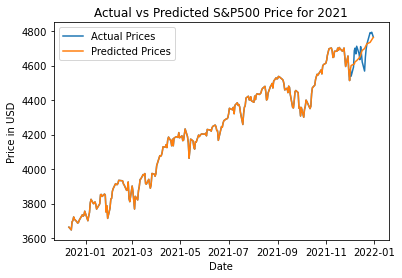

In [11]:
actual_prices = sp500['Adj Close']
predicted_prices = np.exp(linear_prediction+train_and_predict)
plt.plot(sp500['DateTime'],actual_prices,label = 'Actual Prices')
plt.plot(sp500['DateTime'],predicted_prices,label = 'Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.show()

In [12]:
yhat = np.exp(linear_prediction[-days_to_predict:]+forecast_means)
yhat = yhat.to_numpy()
y = sp500['Adj Close'].to_numpy()[-days_to_predict:]

MAPE = 1/days_to_predict*np.sum(np.abs((yhat-y)/y))
RMSE = np.sqrt(1/days_to_predict*np.sum(np.linalg.norm(yhat-y)**2))
ET = np.abs(yhat[-1]-y[-1])

print(MAPE)
print(RMSE)
print(ET)

0.009707881774215107
55.53105762951099
3.324412896312424


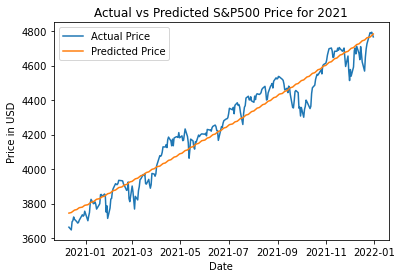

In [13]:
trivial_predict = np.exp(linear_prediction)
plt.plot(sp500['DateTime'],sp500['Adj Close'],label = 'Actual Price')
plt.plot(sp500['DateTime'],trivial_predict,label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.show()

In [14]:
yhat_trivial = np.exp(linear_prediction[-days_to_predict:])


MAPE_triv = 1/days_to_predict*np.sum(np.abs((yhat_trivial-y)/y))
RMSE_triv = np.sqrt(1/days_to_predict*np.sum(np.linalg.norm(yhat_trivial-y)**2))
ET_triv = np.abs(yhat_trivial[-1]-y[-1])

print(MAPE_triv)
print(RMSE_triv)
print(ET_triv)


0.012890579355767718
78.85301532258417
16.81713544792092


In [15]:
print(sp500['DateTime'].iloc[-days_to_predict])

2021-12-03 00:00:00


Construct a 2-month prior and prediction time period plot with confidence intervals

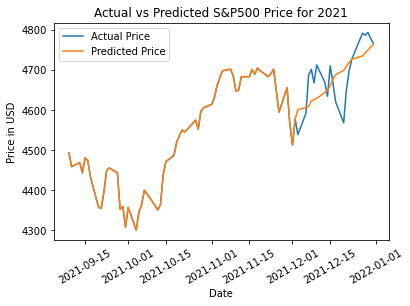

In [16]:
actual_for_report = sp500['Adj Close'].iloc [-(days_to_predict+60):]
predict_for_report = predicted_prices[-(days_to_predict+60):]
date_time_report = sp500['DateTime'].iloc[-(days_to_predict+60):]

plt.plot(date_time_report,actual_for_report,label = 'Actual Price')
plt.plot(date_time_report,predict_for_report,label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.show()

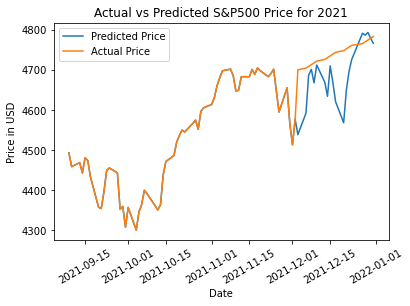

In [17]:
actual_less_test = sp500['Adj Close'].iloc[:-days_to_predict]
trivial_predict_report = trivial_predict[-(days_to_predict):]


trivial_for_report = pd.concat([actual_less_test,pd.DataFrame(trivial_predict_report)])
date_time_report = sp500['DateTime'].iloc[-(days_to_predict+60):]

actual_for_report = sp500['Adj Close'].iloc [-(days_to_predict+60):]
#print(trivial_for_report.iloc[-(days_to_predict+60):])

plt.plot(date_time_report,actual_for_report,label='Predicted Price')
plt.plot(date_time_report,trivial_for_report.iloc[-(days_to_predict+60):][0],label = 'Actual Price')

plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.show()